# OMNIA Timeseries API - Python SDK examples

In [1]:
%matplotlib notebook

## Import Omnia Client from SDK

In [2]:
from omnia_timeseries_sdk import OmniaClient
client = OmniaClient()

## Create and update time series

It is mandatory to name the time series. Additionally you should provide a description and a physical unit of measure and connect it to an asset (equipment, facility etc.).

In [3]:
ts = client.time_series.create("WINCH_4_TOTAL_FORCE", description="Resulting force measured at base plate of winch no. 4", unit="N", asset_id="ASSET_A")

INFO at line 74 in client.py - Authenticating with shared client secret (service-to-service).


The time series is now created in Omnia. Let's check that I got it right.

In [4]:
print(ts)

{
  "id": "b0514c30-c7bf-4d8f-871b-778f42a62459",
  "asset_id": "ASSET_A",
  "name": "WINCH_4_TOTAL_FORCE",
  "description": "Resulting force measured at base plate of winch no. 4",
  "step": false,
  "unit": "N",
  "created_time": "2020-01-23T22:39:34.281000+00:00",
  "changed_time": "2020-01-23T22:39:34.281000+00:00"
}


Oops, I forgot that the unit is `kN` not `N`. I'll update that..

In [5]:
ts.update(unit="kN")
print(ts)

{
  "id": "b0514c30-c7bf-4d8f-871b-778f42a62459",
  "asset_id": "ASSET_A",
  "name": "WINCH_4_TOTAL_FORCE",
  "description": "Resulting force measured at base plate of winch no. 4",
  "step": false,
  "unit": "kN",
  "created_time": "2020-01-23T22:39:34.281000+00:00",
  "changed_time": "2020-01-23T22:39:35.265000+00:00"
}


## Add datapoints

Data points are pairs of datetime and value. Datetime is provided as an ISO-formatted string (RFC3339). The value may be an integer, a float or a string. We also add a status code to each data point (0 is OK).

In [6]:
from datetime import datetime, timedelta, timezone

In [7]:
t0 = datetime.now(tz=timezone.utc) - timedelta(hours=12)
time = [t0, t0 + timedelta(hours=1), t0 + timedelta(hours=3), t0 + timedelta(hours=6)]
values = [1000, 1050, 1300, 1100]
status = [0, 0, 0, 0]
ts.add_data(time, values, status)

Looks good, let's retrieve the datapoints from Omnia and plot them.

<IPython.core.display.Javascript object>


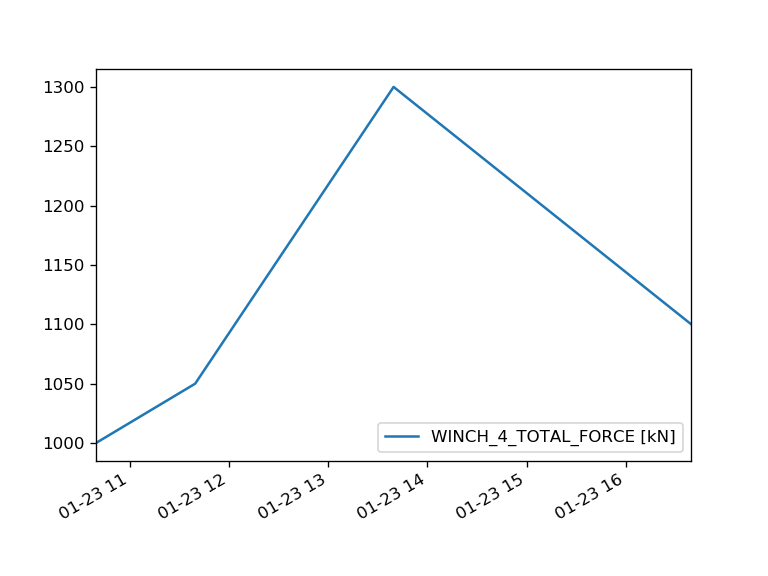

In [8]:
ts.plot()

You can also retrieve the data points and export to Pandas dataframe.

In [9]:
# By default it will retrieve all datapoints the last day. You can adjust the time window with parameters 
# start_time and end_time
dps = ts.data()
df = dps.to_pandas()
df.head()

,WINCH_4_TOTAL_FORCE [kN]
2020-01-23 10:39:35.042000+00:00,1000.0
2020-01-23 11:39:35.042000+00:00,1050.0
2020-01-23 13:39:35.042000+00:00,1300.0
2020-01-23 16:39:35.042000+00:00,1100.0


Explore further using Pandas and whatever... Enjoy!

## Cleaning up

Let's delete the data points and the time series.

In [10]:
# Unfortunately there is a bug in the Timeseries API raising an internal server error despite that the query is successful.
# For now I circumenvent this by cathcing the error.
from omnia_timeseries_sdk.exceptions import OmniaTimeSeriesAPIError
try:
    ts.delete_data()
except OmniaTimeSeriesAPIError:
    pass

ts.delete()

ERROR at line 170 in client.py - Request failed. [500] Internal Server Error. Unable to query timeseries database..
